In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
import statsmodels.api as sm

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
inp0 = pd.read_csv('day.csv')
inp0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
inp0.shape

(730, 16)

In [7]:
inp0.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

conclusion: there is no null value

In [8]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
inp0['dteday'] = pd.to_datetime(inp0['dteday'])
inp0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
pd.to_datetime(inp0['dteday']).dt.year.value_counts()

2018    365
2019    365
Name: dteday, dtype: int64

In [11]:
inp0.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [12]:
inp0.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [13]:
inp0.workingday.value_counts(normalize=True)

1    0.683562
0    0.316438
Name: workingday, dtype: float64

In [14]:
inp0['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
inp0 = inp0.drop(['instant'], axis= 1)
inp0.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
inp0.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


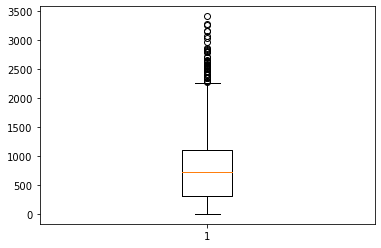

In [17]:
# plt.figure(figsize=(4,4))
# plt.subplot(1,2,1)
plt.boxplot(inp0.casual)
# plt.subplot(1,2,2)
# plt.boxplot(inp0.registered)
plt.show()

In [18]:
inp0[inp0['casual']>3000].shape

(7, 15)

In [19]:
inp0 = inp0[~(inp0['casual']>3000)]

In [20]:
inp0.shape

(723, 15)

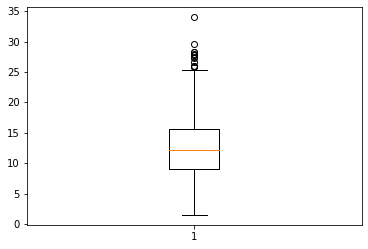

In [21]:
plt.boxplot(inp0.windspeed)
plt.show()

In [22]:
inp0[inp0['windspeed']>30].shape

(1, 15)

In [23]:
inp0 = inp0[~(inp0['windspeed']>30)]

In [24]:
inp0.shape

(722, 15)

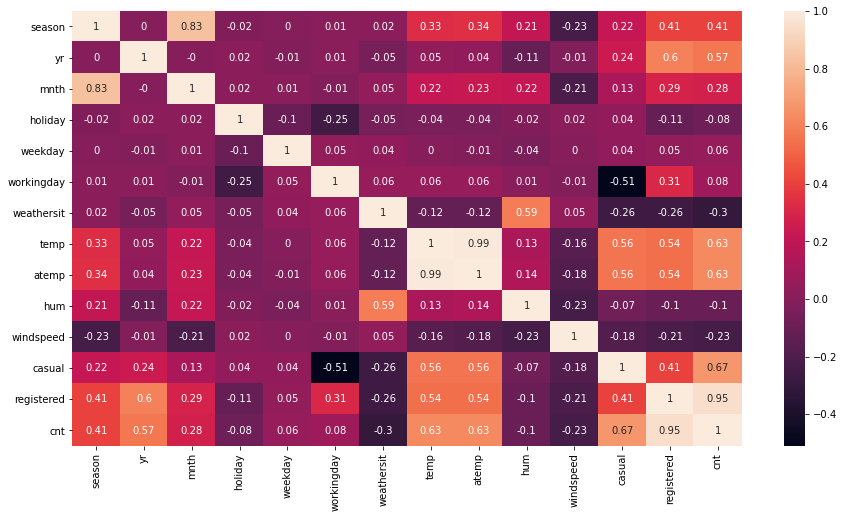

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(round(inp0.corr(), 2), annot=True)
plt.show()

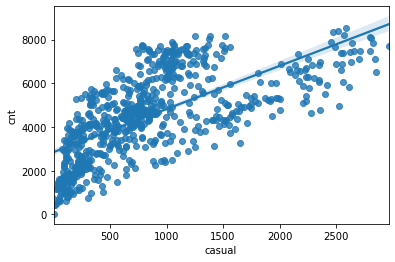

In [26]:
sns.regplot(y='cnt', x= 'casual', data = inp0)
plt.show()

for instance, total count is positively correlated with casual data.

In [27]:
inp0.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**dropping unwanted columns 'instant', 'dteday', 'casual', 'registered'**

In [28]:
inp0 = inp0.drop(['dteday', 'casual', 'registered'], axis= 1)

# inp0 = inp0.drop(['instant'], axis= 1)
inp0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
inp0.weekday.value_counts()

0    104
1    104
2    104
4    104
5    104
3    103
6     99
Name: weekday, dtype: int64

In [30]:
inp0['mnth'].value_counts()

1     62
8     62
12    62
3     61
7     61
10    61
5     60
6     60
11    60
4     59
9     59
2     55
Name: mnth, dtype: int64

In [31]:
inp0['season'].value_counts()

3    186
2    181
1    178
4    177
Name: season, dtype: int64

In [32]:
inp0['weathersit'].value_counts()

1    457
2    244
3     21
Name: weathersit, dtype: int64

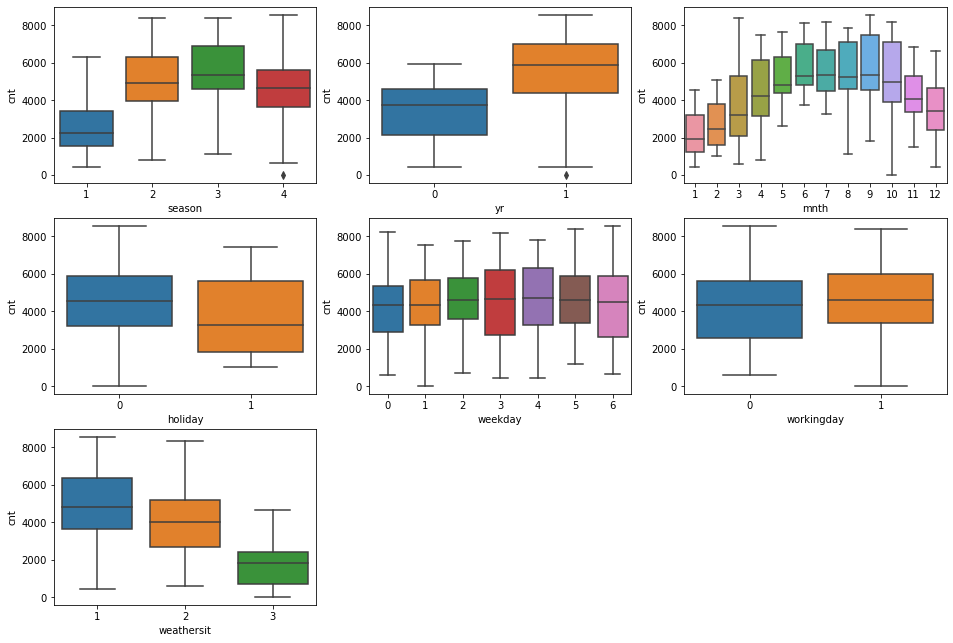

In [33]:
plt.figure(figsize=(16, 11))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = inp0)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = inp0)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = inp0)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = inp0)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = inp0)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = inp0)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = inp0)
plt.show()

Conclusion:
-   1. season3 has the highest demand.
-   2. year 2019 got more demand than 2018.
-   3. for the months, it is increasing and then decreasing.
-   4. holidays has fatty demand for rental bike.
-   5. for weekdays, percentage for 3rd and 6th days is more compared to other days.
-   6. weather1 has more demand than others.

#### converting to category datatype

In [34]:
inp0['weekday'] = inp0['weekday'].astype('category')
inp0['mnth'] = inp0['mnth'].astype('category')
inp0['season'] = inp0['season'].astype('category')
inp0['weathersit'] = inp0['weathersit'].astype('category')

In [35]:
pd.set_option('display.max_columns' , 50)

#### creating dummy variable

In [36]:
categorization = pd.get_dummies(inp0[['weekday','mnth','season', 'weathersit']], drop_first=True)
categorization.head()

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
categorization.shape

(722, 22)

In [38]:
inp0 = pd.concat([inp0, categorization], axis = 1)
inp0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
inp0 = inp0.drop(['weekday','mnth','season', 'weathersit'],axis = 1)
inp0.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
inp0.shape

(722, 30)

### 2. train-test-splitting and rescaling

In [41]:
df_train, df_test = train_test_split(inp0, train_size=0.7, random_state= 100)
print(df_train.shape)
print(df_test.shape)

(505, 30)
(217, 30)


In [42]:
scaler = MinMaxScaler()

var = ['temp', 'atemp', 'hum','windspeed', 'cnt']
df_train[var] = scaler.fit_transform(df_train[var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
728,1,0,0,0.245101,0.204242,0.497001,0.772556,0.211871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
476,1,0,0,0.420587,0.415407,0.859041,0.757007,0.120029,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
112,0,0,0,0.499503,0.496522,0.913025,0.471926,0.479398,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
579,1,0,1,0.880586,0.861496,0.660668,0.434525,0.854294,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
494,1,0,1,0.556613,0.552272,0.567695,0.680658,0.782276,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


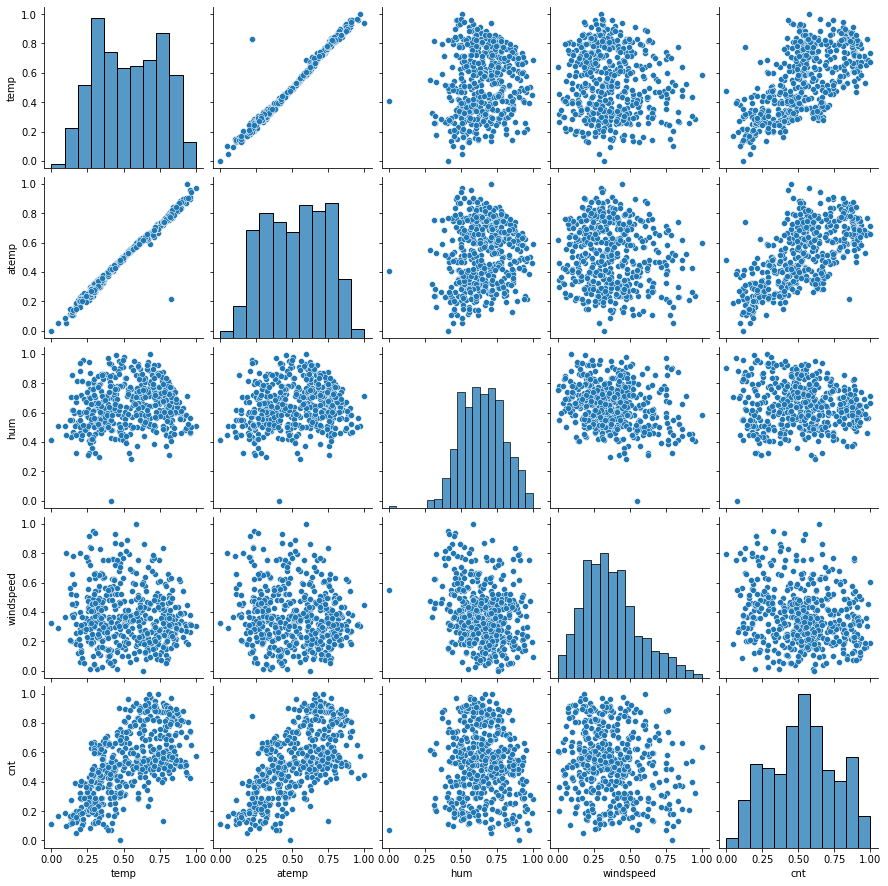

In [43]:
var = ['temp', 'atemp', 'hum','windspeed','cnt']
sns.pairplot(df_train[var], kind= 'scatter')
plt.show()

In [44]:
X_train = df_train
y_train = df_train.pop('cnt')

In [45]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
728,1,0,0,0.245101,0.204242,0.497001,0.772556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
476,1,0,0,0.420587,0.415407,0.859041,0.757007,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
112,0,0,0,0.499503,0.496522,0.913025,0.471926,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
579,1,0,1,0.880586,0.861496,0.660668,0.434525,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
494,1,0,1,0.556613,0.552272,0.567695,0.680658,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [46]:
X_train['weekday_2'].unique()

array([0, 1], dtype=uint8)

In [47]:
y_train.head()

728    0.211871
476    0.120029
112    0.479398
579    0.854294
494    0.782276
Name: cnt, dtype: float64

### model building and VIF

### RFE

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
rfe = RFE(lm, 18)
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 7),
 ('weekday_4', False, 11),
 ('weekday_5', False, 8),
 ('weekday_6', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', False, 4),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', True, 1),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 2),
 ('mnth_12', False, 12),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [52]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'weekday_6', 'mnth_3', 'mnth_5', 'mnth_7', 'mnth_9', 'mnth_10',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [53]:
X_train_rfe = X_train[cols]

### MODEL BUIDING AFTER RFE

### model1

In [54]:
X_train_sm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_sm1)
lr_model1 = lr1.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     154.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          6.29e-188
Time:                        17:47:38   Log-Likelihood:                 503.78
No. Observations:                 505   AIC:                            -969.6
Df Residuals:                     486   BIC:                            -889.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1918      0.029      6.600      0.000       0.135       0.249
yr               0.2335      0.008     28.160      0.000       0.217       0.250
holiday         -0.0778      0.026     -3.047      0.002      -0.128      -0.028
workingday       0.0452      0.012      3.722      0.000       0.021       0.069
temp             0.4539      0.136      3.349      0.001       0.188       0.720
atemp            0.0906      0.137      0.663      0.508      -0.178       0.359
hum             -0.1910      0.038     -4.991      0.000      -0.266      -0.116
windspeed       -0.1429      0.023     -6.269      0.000      -0.188      -0.098
weekday_6        0.0466      0.015      3.032      0.003       0.016       0.077
mnth_3           0.0356      0.016      2.289      0.022       0.005       0.066
mnth_5           0.0382      0.018      2.095      0.037       0.002       0.074
mnth_7          -0.0462      0.019     -2.461      0.014      -0.083      -0.009
mnth_9           0.0866      0.018      4.926      0.000       0.052       0.121
mnth_10          0.0418      0.018      2.352      0.019       0.007       0.077
season_2         0.1095      0.016      6.925      0.000       0.078       0.141
season_3         0.0844      0.022      3.780      0.000       0.041       0.128
season_4         0.1514      0.014     10.663      0.000       0.124       0.179
weathersit_2    -0.0558      0.011     -5.235      0.000      -0.077      -0.035
weathersit_3    -0.2422      0.028     -8.784      0.000      -0.296      -0.188
==============================================================================
Omnibus:                       91.902   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.647
Skew:                          -0.945   Prob(JB):                     4.05e-47
Kurtosis:                       5.566   Cond. No.                         86.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,378.84
4,atemp,360.19
5,hum,18.50
14,season_3,7.96
2,workingday,5.41
6,windspeed,4.15
13,season_2,3.71
15,season_4,3.09
16,weathersit_2,2.27
0,yr,2.06


#### Removing 'atemp' as it has high VIF and high p-value

### model 2

In [56]:
X_train_df1 = X_train_rfe.drop(['atemp'], axis = 1)

In [57]:
X_train_df1.shape

(505, 17)

In [58]:
X_train_sm2 = sm.add_constant(X_train_df1)
lr2 = sm.OLS(y_train, X_train_sm2)
lr_model2 = lr2.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     163.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          6.02e-189
Time:                        17:47:39   Log-Likelihood:                 503.56
No. Observations:                 505   AIC:                            -971.1
Df Residuals:                     487   BIC:                            -895.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1932      0.029      6.671      0.000       0.136       0.250
yr               0.2335      0.008     28.186      0.000       0.217       0.250
holiday         -0.0785      0.025     -3.081      0.002      -0.129      -0.028
workingday       0.0450      0.012      3.706      0.000       0.021       0.069
temp             0.5405      0.036     15.082      0.000       0.470       0.611
hum             -0.1900      0.038     -4.972      0.000      -0.265      -0.115
windspeed       -0.1457      0.022     -6.510      0.000      -0.190      -0.102
weekday_6        0.0465      0.015      3.025      0.003       0.016       0.077
mnth_3           0.0359      0.016      2.310      0.021       0.005       0.066
mnth_5           0.0382      0.018      2.094      0.037       0.002       0.074
mnth_7          -0.0454      0.019     -2.423      0.016      -0.082      -0.009
mnth_9           0.0873      0.018      4.973      0.000       0.053       0.122
mnth_10          0.0421      0.018      2.368      0.018       0.007       0.077
season_2         0.1098      0.016      6.950      0.000       0.079       0.141
season_3         0.0829      0.022      3.734      0.000       0.039       0.127
season_4         0.1519      0.014     10.722      0.000       0.124       0.180
weathersit_2    -0.0559      0.011     -5.246      0.000      -0.077      -0.035
weathersit_3    -0.2425      0.028     -8.798      0.000      -0.297      -0.188
==============================================================================
Omnibus:                       92.211   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.182
Skew:                          -0.946   Prob(JB):                     1.88e-47
Kurtosis:                       5.578   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['features'] = X_train_df1.columns
vif['VIF'] = [variance_inflation_factor(X_train_df1.values, i) for i in range (X_train_df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,25.91
4,hum,18.16
13,season_3,7.87
2,workingday,5.41
5,windspeed,4.03
12,season_2,3.71
14,season_4,3.08
15,weathersit_2,2.27
0,yr,2.06
6,weekday_6,1.94


### model 3

#### as temp is an important factor for business, cant drop it. instead we can drop humidity

In [60]:
X_train_df1 = X_train_df1.drop(['hum'], axis = 1)

In [61]:
X_train_df1.shape

(505, 16)

In [62]:
X_train_sm3= sm.add_constant(X_train_df1)
lr3 = sm.OLS(y_train, X_train_sm3)
lr_model3 = lr3.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          7.42e-185
Time:                        17:47:39   Log-Likelihood:                 491.06
No. Observations:                 505   AIC:                            -948.1
Df Residuals:                     488   BIC:                            -876.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0873      0.020      4.345      0.000       0.048       0.127
yr               0.2380      0.008     28.225      0.000       0.221       0.255
holiday         -0.0770      0.026     -2.948      0.003      -0.128      -0.026
workingday       0.0482      0.012      3.879      0.000       0.024       0.073
temp             0.4994      0.036     13.986      0.000       0.429       0.570
windspeed       -0.1172      0.022     -5.289      0.000      -0.161      -0.074
weekday_6        0.0470      0.016      2.984      0.003       0.016       0.078
mnth_3           0.0398      0.016      2.505      0.013       0.009       0.071
mnth_5           0.0262      0.019      1.415      0.158      -0.010       0.063
mnth_7          -0.0388      0.019     -2.027      0.043      -0.076      -0.001
mnth_9           0.0751      0.018      4.221      0.000       0.040       0.110
mnth_10          0.0434      0.018      2.385      0.017       0.008       0.079
season_2         0.1175      0.016      7.297      0.000       0.086       0.149
season_3         0.0946      0.023      4.182      0.000       0.050       0.139
season_4         0.1458      0.014     10.088      0.000       0.117       0.174
weathersit_2    -0.0870      0.009     -9.847      0.000      -0.104      -0.070
weathersit_3    -0.2952      0.026    -11.333      0.000      -0.346      -0.244
==============================================================================
Omnibus:                       90.533   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.233
Skew:                          -0.930   Prob(JB):                     1.35e-46
Kurtosis:                       5.565   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['features'] = X_train_df1.columns
vif['VIF'] = [variance_inflation_factor(X_train_df1.values, i) for i in range (X_train_df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,19.05
12,season_3,7.64
2,workingday,4.81
4,windspeed,3.89
11,season_2,3.67
13,season_4,2.91
0,yr,2.06
5,weekday_6,1.77
7,mnth_5,1.73
8,mnth_7,1.64


### model 4

#### dropping 'season_3' beacause of it has high VIF value

In [64]:
X_train_df1 = X_train_df1.drop(['season_3'], axis = 1)

In [65]:
X_train_df1.shape

(505, 15)

In [66]:
X_train_sm4= sm.add_constant(X_train_df1)
lr4 = sm.OLS(y_train, X_train_sm4)
lr_model4 = lr4.fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          2.89e-182
Time:                        17:47:40   Log-Likelihood:                 482.16
No. Observations:                 505   AIC:                            -932.3
Df Residuals:                     489   BIC:                            -864.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0756      0.020      3.737      0.000       0.036       0.115
yr               0.2351      0.009     27.513      0.000       0.218       0.252
holiday         -0.0881      0.026     -3.337      0.001      -0.140      -0.036
workingday       0.0467      0.013      3.700      0.000       0.022       0.071
temp             0.6115      0.024     25.482      0.000       0.564       0.659
windspeed       -0.1235      0.022     -5.498      0.000      -0.168      -0.079
weekday_6        0.0462      0.016      2.887      0.004       0.015       0.078
mnth_3           0.0258      0.016      1.633      0.103      -0.005       0.057
mnth_5           0.0098      0.018      0.530      0.596      -0.026       0.046
mnth_7          -0.0242      0.019     -1.267      0.206      -0.062       0.013
mnth_9           0.0972      0.017      5.621      0.000       0.063       0.131
mnth_10          0.0301      0.018      1.653      0.099      -0.006       0.066
season_2         0.0765      0.013      5.890      0.000       0.051       0.102
season_4         0.1163      0.013      9.069      0.000       0.091       0.141
weathersit_2    -0.0871      0.009     -9.694      0.000      -0.105      -0.069
weathersit_3    -0.2923      0.026    -11.042      0.000      -0.344      -0.240
==============================================================================
Omnibus:                       74.290   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.167
Skew:                          -0.817   Prob(JB):                     5.50e-34
Kurtosis:                       5.147   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
vif['features'] = X_train_df1.columns
vif['VIF'] = [variance_inflation_factor(X_train_df1.values, i) for i in range (X_train_df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,7.13
2,workingday,4.76
4,windspeed,3.79
11,season_2,2.31
12,season_4,2.05
0,yr,2.03
5,weekday_6,1.76
7,mnth_5,1.66
13,weathersit_2,1.59
8,mnth_7,1.58


### model 5

#### dropping month_5 as it has very high p-value.

In [68]:
X_train_df1 = X_train_df1.drop(['mnth_5'], axis = 1)
X_train_df1.shape

(505, 14)

In [69]:
X_train_sm5= sm.add_constant(X_train_df1)
lr5 = sm.OLS(y_train, X_train_sm5)
lr_model5 = lr5.fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.1
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          2.42e-183
Time:                        17:47:40   Log-Likelihood:                 482.02
No. Observations:                 505   AIC:                            -934.0
Df Residuals:                     490   BIC:                            -870.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0753      0.020      3.727      0.000       0.036       0.115
yr               0.2347      0.009     27.575      0.000       0.218       0.251
holiday         -0.0874      0.026     -3.316      0.001      -0.139      -0.036
workingday       0.0470      0.013      3.729      0.000       0.022       0.072
temp             0.6130      0.024     25.758      0.000       0.566       0.660
windspeed       -0.1244      0.022     -5.552      0.000      -0.168      -0.080
weekday_6        0.0465      0.016      2.908      0.004       0.015       0.078
mnth_3           0.0245      0.016      1.571      0.117      -0.006       0.055
mnth_7          -0.0251      0.019     -1.316      0.189      -0.063       0.012
mnth_9           0.0966      0.017      5.602      0.000       0.063       0.130
mnth_10          0.0299      0.018      1.643      0.101      -0.006       0.066
season_2         0.0798      0.011      7.004      0.000       0.057       0.102
season_4         0.1162      0.013      9.068      0.000       0.091       0.141
weathersit_2    -0.0871      0.009     -9.701      0.000      -0.105      -0.069
weathersit_3    -0.2927      0.026    -11.067      0.000      -0.345      -0.241
==============================================================================
Omnibus:                       74.490   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.506
Skew:                          -0.822   Prob(JB):                     7.65e-34
Kurtosis:                       5.133   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['features'] = X_train_df1.columns
vif['VIF'] = [variance_inflation_factor(X_train_df1.values, i) for i in range (X_train_df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,7.01
2,workingday,4.75
4,windspeed,3.76
11,season_4,2.05
0,yr,2.02
10,season_2,1.78
5,weekday_6,1.76
12,weathersit_2,1.59
9,mnth_10,1.58
7,mnth_7,1.57


### model6

#### dropping month_7 as it has very high p-value

In [71]:
X_train_df1 = X_train_df1.drop(['mnth_7'], axis = 1)
X_train_df1.shape

(505, 13)

In [72]:
X_train_sm6= sm.add_constant(X_train_df1)
lr6 = sm.OLS(y_train, X_train_sm6)
lr_model6 = lr6.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     194.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          4.03e-184
Time:                        17:47:41   Log-Likelihood:                 481.13
No. Observations:                 505   AIC:                            -934.3
Df Residuals:                     491   BIC:                            -875.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0777      0.020      3.858      0.000       0.038       0.117
yr               0.2352      0.009     27.628      0.000       0.218       0.252
holiday         -0.0867      0.026     -3.290      0.001      -0.139      -0.035
workingday       0.0475      0.013      3.766      0.000       0.023       0.072
temp             0.5987      0.021     28.256      0.000       0.557       0.640
windspeed       -0.1237      0.022     -5.521      0.000      -0.168      -0.080
weekday_6        0.0461      0.016      2.886      0.004       0.015       0.078
mnth_3           0.0253      0.016      1.622      0.105      -0.005       0.056
mnth_9           0.1030      0.017      6.223      0.000       0.070       0.135
mnth_10          0.0324      0.018      1.788      0.074      -0.003       0.068
season_2         0.0848      0.011      7.894      0.000       0.064       0.106
season_4         0.1181      0.013      9.271      0.000       0.093       0.143
weathersit_2    -0.0867      0.009     -9.660      0.000      -0.104      -0.069
weathersit_3    -0.2937      0.026    -11.104      0.000      -0.346      -0.242
==============================================================================
Omnibus:                       76.663   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.446
Skew:                          -0.844   Prob(JB):                     1.07e-34
Kurtosis:                       5.141   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
vif['features'] = X_train_df1.columns
vif['VIF'] = [variance_inflation_factor(X_train_df1.values, i) for i in range (X_train_df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,5.24
2,workingday,4.72
4,windspeed,3.74
0,yr,2.02
10,season_4,2.00
5,weekday_6,1.76
9,season_2,1.58
11,weathersit_2,1.58
8,mnth_10,1.56
7,mnth_9,1.22


### model7

#### dropping 'mnth_3' as it has high p-value

In [74]:
X_train_df1 = X_train_df1.drop(['mnth_3'], axis = 1)
X_train_df1.shape

(505, 12)

In [75]:
X_train_sm7= sm.add_constant(X_train_df1)
lr7 = sm.OLS(y_train, X_train_sm7)
lr_model7 = lr7.fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     209.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.00e-184
Time:                        17:47:42   Log-Likelihood:                 479.78
No. Observations:                 505   AIC:                            -933.6
Df Residuals:                     492   BIC:                            -878.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0832      0.020      4.181      0.000       0.044       0.122
yr               0.2352      0.009     27.586      0.000       0.218       0.252
holiday         -0.0885      0.026     -3.354      0.001      -0.140      -0.037
workingday       0.0481      0.013      3.814      0.000       0.023       0.073
temp             0.5917      0.021     28.477      0.000       0.551       0.633
windspeed       -0.1210      0.022     -5.407      0.000      -0.165      -0.077
weekday_6        0.0466      0.016      2.908      0.004       0.015       0.078
mnth_9           0.1018      0.017      6.149      0.000       0.069       0.134
mnth_10          0.0331      0.018      1.825      0.069      -0.003       0.069
season_2         0.0855      0.011      7.950      0.000       0.064       0.107
season_4         0.1142      0.013      9.114      0.000       0.090       0.139
weathersit_2    -0.0871      0.009     -9.688      0.000      -0.105      -0.069
weathersit_3    -0.2917      0.026    -11.020      0.000      -0.344      -0.240
==============================================================================
Omnibus:                       76.013   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.891
Skew:                          -0.836   Prob(JB):                     1.41e-34
Kurtosis:                       5.148   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
vif['features'] = X_train_df1.columns
vif['VIF'] = [variance_inflation_factor(X_train_df1.values, i) for i in range (X_train_df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,5.15
2,workingday,4.64
4,windspeed,3.61
0,yr,2.01
9,season_4,1.96
5,weekday_6,1.74
10,weathersit_2,1.58
8,season_2,1.57
7,mnth_10,1.56
6,mnth_9,1.22


### model8

#### dropping 'mnth_10' as it has high p-value

In [77]:
X_train_df1 = X_train_df1.drop(['mnth_10'], axis = 1)
X_train_df1.shape

(505, 11)

In [78]:
X_train_sm8= sm.add_constant(X_train_df1)
lr8 = sm.OLS(y_train, X_train_sm8)
lr_model8 = lr8.fit()
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          3.40e-185
Time:                        17:47:43   Log-Likelihood:                 478.07
No. Observations:                 505   AIC:                            -932.1
Df Residuals:                     493   BIC:                            -881.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0799      0.020      4.026      0.000       0.041       0.119
yr               0.2350      0.009     27.496      0.000       0.218       0.252
holiday         -0.0895      0.026     -3.386      0.001      -0.141      -0.038
workingday       0.0472      0.013      3.736      0.000       0.022       0.072
temp             0.5983      0.021     29.174      0.000       0.558       0.639
windspeed       -0.1198      0.022     -5.341      0.000      -0.164      -0.076
weekday_6        0.0460      0.016      2.867      0.004       0.014       0.078
mnth_9           0.0983      0.016      5.965      0.000       0.066       0.131
season_2         0.0847      0.011      7.869      0.000       0.064       0.106
season_4         0.1257      0.011     11.593      0.000       0.104       0.147
weathersit_2    -0.0862      0.009     -9.582      0.000      -0.104      -0.069
weathersit_3    -0.2881      0.026    -10.889      0.000      -0.340      -0.236
==============================================================================
Omnibus:                       68.807   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.324
Skew:                          -0.785   Prob(JB):                     1.12e-29
Kurtosis:                       4.967   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
vif['features'] = X_train_df1.columns
vif['VIF'] = [variance_inflation_factor(X_train_df1.values, i) for i in range (X_train_df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,5.03
2,workingday,4.60
4,windspeed,3.61
0,yr,2.01
5,weekday_6,1.74
9,weathersit_2,1.58
7,season_2,1.57
8,season_4,1.45
6,mnth_9,1.20
1,holiday,1.16


#### seeing the above data, there is no multicollinearity as all the VIF values are around 5 or less than 5.

### the best fit equation:

- cnt = 0.0799 + (yr x 0.235) - (holiday x 0.0895) + (workingday x 0.0472) + (temp x 0.5983) - (windspeed x 0.1198) + 
    (weekday_6 x 0.046) + (mnth_9 x 0.0983) + (season_2 x 0.0847) + (season_4 x 0.1257) - (weathersit_2 x 0.0862) - 
    (weathersit_3 x 0.2881) 

### Interpretation of Coefficients:

- const: Constant value '0.0799' indicats if there is no other predictor variables 
     the count will still be increasing by '0.0799' units.

- yr: yr coefficient '0.235' indicates that if a unit value increase of yr variable, 
        count increases by '0.235' units.
        
- holiday: workingday coefficient '0.0895' indicates that if a unit value increase of workingday variable, 
        count increases by '0.0895' units.
        
- workingday: workingday coefficient '0.0472' indicates that if a unit value increase of workingday variable, 
        count increases by '0.0472' units.
-  ...
-  ...
-  ...


- weathersit_moderate: weathersit_moderate coefficient '0.2881' indicates that if a unit value increase of 
       weathersit_moderate variable, count decreases by '0.2881' units.

In [80]:
from sklearn.metrics import r2_score

In [81]:
y_train_pred = lr_model8.predict(X_train_sm8)
r2_score(y_true = y_train, y_pred = y_train_pred)

0.8354535741202622

In [82]:
r2_train = 0.8354535741202622

In [83]:
X_train_df1.shape

(505, 11)

In [84]:
n_train = X_train_df1.shape[0]
p_train = X_train_df1.shape[1]
print(n_train,p_train)

505 11


In [85]:
adjusted_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
adjusted_r2_train

0.8317821528531687

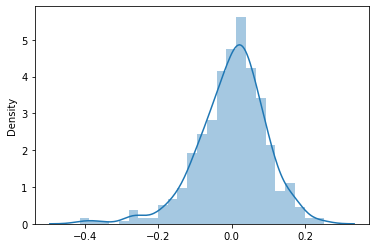

In [86]:
y_train_pred = lr_model8.predict(X_train_sm8)
res = y_train-y_train_pred
sns.distplot(res)
plt.show()

In [87]:
# scaler = MinMaxScaler()

var = ['temp', 'atemp', 'hum','windspeed', 'cnt']
df_test[var] = scaler.fit_transform(df_test[var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
200,0,0,1,0.892600,0.873263,0.600505,0.228630,0.479542,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
491,1,0,1,0.585905,0.577183,0.535398,0.520975,0.718758,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
367,1,0,1,0.071054,0.036973,0.197219,0.858449,0.221223,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
628,1,0,1,0.667838,0.637595,0.542351,0.329689,0.952181,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
645,1,1,0,0.381071,0.389147,0.604298,0.418340,0.620779,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [88]:
df_test.shape

(217, 30)

In [89]:
X_test = df_test
y_test = df_test.pop('cnt')

In [90]:
X_test = X_test[X_train_df1.columns]
X_test.shape

(217, 11)

In [91]:
X_test_sm8 = sm.add_constant(X_test)
X_test_sm8.shape

(217, 12)

In [92]:
X_test_sm8.head()

,const,yr,holiday,workingday,temp,windspeed,weekday_6,mnth_9,season_2,season_4,weathersit_2,weathersit_3
200,1.0,0,0,1,0.892600,0.228630,0,0,0,0,0,0
491,1.0,1,0,1,0.585905,0.520975,0,0,1,0,1,0
367,1.0,1,0,1,0.071054,0.858449,0,0,0,0,0,0
628,1.0,1,0,1,0.667838,0.329689,0,1,0,0,0,0
645,1.0,1,1,0,0.381071,0.418340,0,0,0,1,1,0


In [93]:
y_test_pred = lr_model8.predict(X_test_sm8)
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7813840394712305

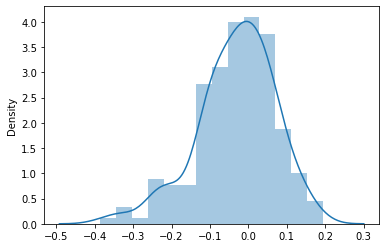

In [94]:
y_test_pred = lr_model8.predict(X_test_sm8)
res_test = y_test-y_test_pred
sns.distplot(res_test)
plt.show()

In [95]:
r2_test = 0.7813840394712305

In [96]:
X_test.shape

(217, 11)

In [97]:
n_test = X_test.shape[0]
p_test = X_test.shape[1]
print(n_test,p_test)

217 11


In [98]:
adjusted_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
adjusted_r2_test

0.7696534269550526

### test model evaluation

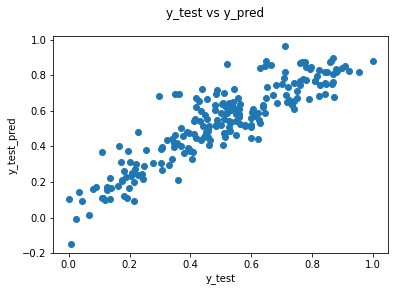

In [99]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, )
fig.suptitle('y_test vs y_pred', fontsize = 12)  
plt.xlabel('y_test', fontsize = 10)      
plt.ylabel('y_test_pred', fontsize = 10) 
plt.show()

In [100]:
lr_model8.params

const           0.079945
yr              0.234966
holiday        -0.089530
workingday      0.047216
temp            0.598345
windspeed      -0.119793
weekday_6       0.045999
mnth_9          0.098338
season_2        0.084727
season_4        0.125721
weathersit_2   -0.086246
weathersit_3   -0.288082
dtype: float64

conclusion:
-  above is the significant variables to predict the demand for shared bikes.
-  Temp (co-efficient: 0.5983), year (co-efficient: 0.2349), and winter season (co-efficient: 0.1257) has important role.
-  comapny should focus more on weathersit_3, windspeed and weekday_6 for better expansion.